In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(6,3)}, style='whitegrid')
%matplotlib inline
import scipy
from statsmodels.stats.weightstats import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
import scipy
import statsmodels

In [3]:
data = pd.read_csv('measures.txt')

In [4]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


### 4. Сгенерируйте новые признаки:

Нормализация вектора тока (корень квадратный из суммы квадратов токов);
нормализация вектора напряжения (корень квадратный из суммы квадратов напряжения);
полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения);
эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [5]:
data['n_i'] = np.sqrt(data['i_d']**2+data['i_q']**2)
data['n_u'] = np.sqrt(data['u_d']**2+data['u_q']**2)
data['t_p'] = data['n_i']*data['n_u']
data['eff_p'] = (data['i_d']*data['u_d'])+(data['i_q']*data['u_q'])

In [6]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,n_i,n_u,t_p,eff_p
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,0.004431,0.570659,0.002529,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,0.000992,0.446789,0.000443,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,0.001346,0.577165,0.000777,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,0.002046,0.454893,0.000931,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,0.074292,0.576530,0.042832,0.003852


### 5. Заново постройте обе модели, сравните результаты с предыдущими. Провизуализируйте решения, напишите выводы.

#### Линейная регрессия

In [7]:
R = data.drop(columns=['motor_speed'])
h = data['motor_speed']

In [8]:
R.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,n_i,n_u,t_p,eff_p
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,0.004431,0.570659,0.002529,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,0.000992,0.446789,0.000443,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,0.001346,0.577165,0.000777,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,0.002046,0.454893,0.000931,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,0.074292,0.576530,0.042832,0.003852


In [9]:
h

0             0.002866
1             0.000257
2             0.002355
3             0.006105
4             0.003133
              ...     
1048570    2096.735442
1048571    2039.850834
1048572    1989.249199
1048573    1928.984749
1048574    1874.340648
Name: motor_speed, Length: 1048575, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

R_train, R_test, h_train, h_test = train_test_split(R, h, test_size=0.15)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(R_train, h_train)

LinearRegression()

In [13]:
lr.coef_

array([ 2.75853093e+01,  2.90154795e+01, -2.30748420e+01, -3.23266388e+00,
        1.01443536e+02, -3.02160770e+01,  2.35906781e+01,  7.57157671e+00,
       -1.09679096e+02, -1.54517678e+01, -3.26359249e+01, -2.12772581e+00,
       -9.02258080e+00, -7.27965937e+00,  5.50136554e-03,  5.98975414e-03])

In [14]:
lr.intercept_

171.6708465766003

In [15]:
h_train_predicted = lr.predict(R_train)
h_test_predicted = lr.predict(R_test)

In [16]:
np.array(h_test)

array([ 250.01565552, 3789.04244806, 4999.94628906, ..., 4499.94921875,
       3999.95556641, 3999.95654297])

In [17]:
np.array(h_test_predicted)

array([ 228.57648282, 3867.24777079, 5004.1063739 , ..., 4838.97833738,
       4076.39591514, 4345.05747582])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
mean_absolute_error(h_train_predicted, h_train), mean_absolute_error(h_test_predicted, h_test)

(239.02410620931576, 238.7624468554438)

In [20]:
mean_squared_error(h_train_predicted, h_train), mean_squared_error(h_test_predicted, h_test)

(113297.40893820258, 112600.60782221555)

#### Перекрестная проверка на 5 фолдах

In [21]:
h = np.ravel(h)

In [22]:
model = LinearRegression()
model = model.fit(R, h)

In [23]:
model.score(R, h)

0.9677708950604922

In [24]:
scores = cross_val_score(LinearRegression(), R, h, cv = 5)
print(scores)
print(scores.mean())

[0.97345416 0.96630073 0.95744442 0.94189615 0.94733923]
0.9572869362806962


#### Визуализация

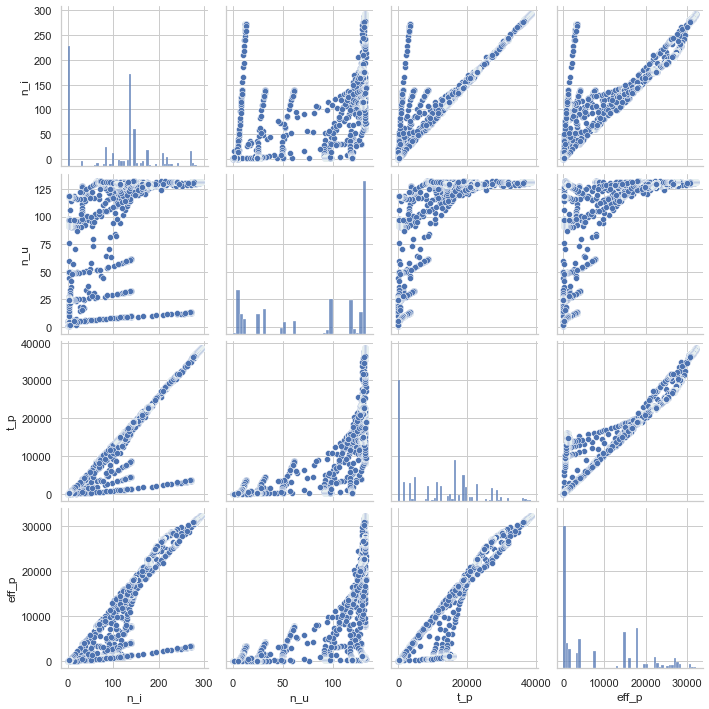

In [25]:
cols_to_plot = ['n_i', 'n_u', 't_p', 'eff_p']
sns.pairplot(data[cols_to_plot][:200000])

#### knn модель

In [26]:
from sklearn.model_selection import train_test_split
R_train, R_test, h_train, h_test = train_test_split(R, h, test_size = 0.2, random_state = 0)

In [27]:
R_train.shape, R_test.shape

((838860, 16), (209715, 16))

In [28]:
cols = R_train.columns

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
R_train = scaler.fit_transform(R_train)
R_test = scaler.transform(R_test)

In [30]:
R_train = pd.DataFrame(R_train, columns=[cols])

In [31]:
R_test = pd.DataFrame(R_test, columns=[cols])

In [32]:
R_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,n_i,n_u,t_p,eff_p
0,-0.514270,-0.649985,-0.184687,-0.189046,-0.395674,0.074673,1.415477,-0.561968,-0.500365,0.304462,1.341012,-0.778171,0.860868,-0.573628,-0.152207,0.177543
1,-1.132618,-0.694867,-1.511536,0.489891,-1.535377,1.034999,-0.461489,-1.648808,-1.368020,-1.041430,-0.470422,-1.297005,-1.262718,-1.459542,-1.054883,-0.477432
2,1.045321,1.426654,0.923593,1.816556,1.152606,-0.822121,-1.062332,0.562893,1.348498,-0.486159,-1.124533,1.057702,0.299428,0.909491,0.631988,-1.767997
3,1.587104,-0.641885,-0.339662,-0.008859,-0.185958,0.992699,-0.146451,0.886206,-0.296899,-1.704260,-0.213792,-0.139606,-0.936938,0.836031,-0.692796,-0.168675
4,-1.027602,-0.673023,1.265955,0.309091,0.721160,-0.780799,2.173511,-1.077361,0.313059,-0.949703,2.222016,-1.336915,1.867381,-1.295088,-0.715233,-0.206567


In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(R_train, h_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
h_train_predicted_knn = knn.predict(R_train)
h_test_predicted_knn = knn.predict(R_test)

In [34]:
h_train_predicted_lr = lr.predict(R_train)
h_test_predicted_lr = lr.predict(R_test)

In [35]:
mean_absolute_error(h_train_predicted_knn, h_train), mean_squared_error(h_train_predicted_knn, h_train)

(7.5364959686593895, 736.031356848045)

In [36]:
mean_absolute_error(h_test_predicted_knn, h_test), mean_squared_error(h_test_predicted_knn, h_test)

(12.593803619484476, 1852.5353745694483)

In [37]:
mean_absolute_error(h_train_predicted_lr, h_train), mean_squared_error(h_train_predicted_lr, h_train)

(2072.07985393207, 7538129.503808575)

In [38]:
mean_absolute_error(h_test_predicted_lr, h_test), mean_squared_error(h_test_predicted_lr, h_test)

(2068.459641923224, 7531241.360909181)

##### Проверка на переобучение и недообучение

In [ ]:
print('Training set score: {:0.4f}'.format(knn.score(R_train, h_train)))
print ('Test set score: {:0.4f}'.format(knn.score(R_test, h_test)))

In [ ]:
print('Training set score: {:0.4f}'.format(lr.score(R_train, h_train)))
print ('Test set score: {:0.4f}'.format(lr.score(R_test, h_test)))

#### Перекрестная проверка на 5 фолдах

In [ ]:
h = np.ravel(h)

In [ ]:
model = KNeighborsRegressor()
model = model.fit(R, h)

In [ ]:
model.score(R, h)

In [ ]:
scores = cross_val_score(KNeighborsRegressor(), R, h, cv = 5)
print(scores)
print(scores.mean())